In [1]:
import torch
%load_ext autoreload
%autoreload 2

In [2]:
filename = "mandarins"
original_image = f"data/{filename}.png"
image_fore = f"data/{filename}_fore.png"
image_back = f"data/{filename}_back.png"

In [3]:
from matplotlib import pyplot as plt
import pandas as pd
df = pd.read_csv(r".snapshots/mandarins_convex_teacher/log.csv", index_col="epoch")
loss_convex = df["train_loss"]
df = pd.read_csv(r".snapshots/mandarins_pc_teacher/log.csv", index_col="epoch")
loss_connected = df["train_loss"]

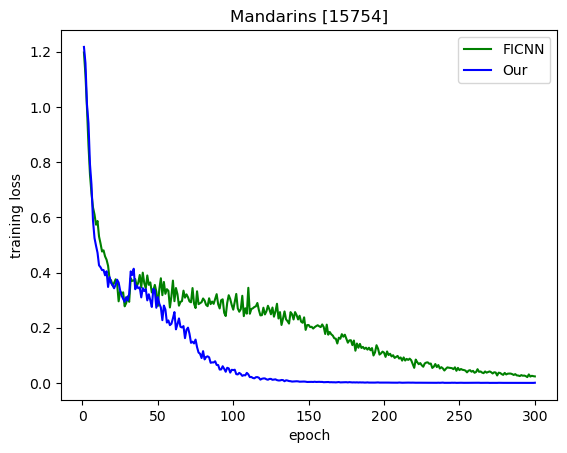

In [4]:
plt.plot(loss_convex, c="g")
plt.plot(loss_connected, c="b")
plt.title("Mandarins [15754]")
plt.xlabel("epoch")
plt.ylabel("training loss")
plt.legend(["FICNN", "Our"])

In [1]:
from utils.data_utils import ImageDataset
from utils.log_save_utils import CheckpointManager
from models import Network, FlowNetwork
import torch

original_image = f"data/apples.png"
image_gt_fore = f"data/gt/apples_fore.png"
image_gt_back = f"data/gt/apples_back.png"

ground_truth_apples = ImageDataset(original_image, image_gt_fore, image_gt_back)
data = torch.tensor(ground_truth_apples.data[:, :2])
labels = torch.tensor(ground_truth_apples.labels)

cm = CheckpointManager(".snapshots/apples_convex", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
convex_apples = convex(data).detach().round()

cm = CheckpointManager(".snapshots/apples_convex_teacher", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
convex_apples_teacher = convex(data).detach().round()

cm = CheckpointManager(".snapshots/apples_pc", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
cm = CheckpointManager(".snapshots/apples_pc", "flow")
flow = cm.load(FlowNetwork(2, 50), None)[0]
flow_apples = convex(flow(data)).detach().round()

cm = CheckpointManager(".snapshots/apples_pc_teacher", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
cm = CheckpointManager(".snapshots/apples_pc_teacher", "flow")
flow = cm.load(FlowNetwork(2, 50), None)[0]
flow_apples_teacher = convex(flow(data)).detach().round()

from torchmetrics import JaccardIndex
iou = JaccardIndex(task='binary', num_classes=2)
print(iou(convex_apples, labels), iou(convex_apples_teacher, labels))
print(iou(flow_apples, labels), iou(flow_apples_teacher, labels))

tensor(0.9443) tensor(0.9434)
tensor(0.9500) tensor(0.9284)


In [2]:
from utils.data_utils import ImageDataset
from utils.log_save_utils import CheckpointManager
from models import Network, FlowNetwork
import torch

original_image = f"data/mandarins.png"
image_gt_fore = f"data/gt/mandarins_fore.png"
image_gt_back = f"data/gt/mandarins_back.png"

ground_truth_mandarins = ImageDataset(original_image, image_gt_fore, image_gt_back, eps=3e-5)
data = torch.tensor(ground_truth_mandarins.data[:, :2])
labels = torch.tensor(ground_truth_mandarins.labels)

cm = CheckpointManager(".snapshots/mandarins_convex", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
convex_mandarins = convex(data)

cm = CheckpointManager(".snapshots/mandarins_convex_teacher", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
convex_mandarins_teacher = convex(data)

cm = CheckpointManager(".snapshots/mandarins_pc", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
cm = CheckpointManager(".snapshots/mandarins_pc", "flow")
flow = cm.load(FlowNetwork(2, 50), None)[0]
flow_mandarins = convex(flow(data))

cm = CheckpointManager(".snapshots/mandarins_pc_teacher", "convex")
convex = cm.load(Network(2, hidden_neurons=80, convex=True), None)[0]
cm = CheckpointManager(".snapshots/mandarins_pc_teacher", "flow")
flow = cm.load(FlowNetwork(2, 50), None)[0]
flow_mandarins_teacher = convex(flow(data))

from torchmetrics import JaccardIndex
iou = JaccardIndex(task='binary', num_classes=2)
print(iou(convex_mandarins, labels), iou(convex_mandarins_teacher, labels))
print(iou(flow_mandarins, labels), iou(flow_mandarins_teacher, labels))

tensor(0.9152) tensor(0.9345)
tensor(0.9422) tensor(0.9592)


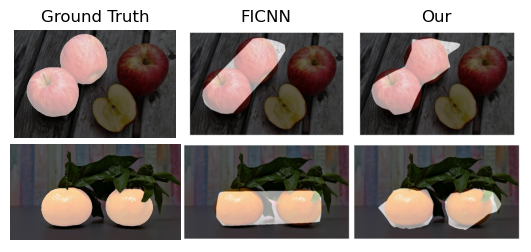

In [43]:
from matplotlib import pyplot as plt
import numpy as np

def show(ax, image, mask: torch.Tensor):
    mask = mask.detach().round().numpy().reshape(image.shape[:2])
    ax.axis("off")
    ax.imshow(image)
    ax.imshow(mask, cmap="Greys", alpha=0.6)

apples_original = plt.imread("data/apples.png")
mandarins_original = plt.imread("data/mandarins.png")

fig, ax = plt.subplots(2, 3)
ax[0, 0].axis("off")
ax[0, 1].axis("off")
ax[0, 2].axis("off")
ax[1, 0].axis("off")
ax[1, 1].axis("off")
ax[1, 2].axis("off")
ax[0,0].title.set_text("Ground Truth")
ax[0,1].title.set_text("FICNN")
ax[0,2].title.set_text("Our")
show(ax[0,0], apples_original, torch.tensor(ground_truth_apples.mask_back, dtype=float))
ax[0,1].imshow(plt.imread("data/results/apples_convex.png"))
ax[0,2].imshow(plt.imread("data/results/apples_pc.png"))
show(ax[1,0], mandarins_original, torch.tensor(ground_truth_mandarins.mask_back, dtype=float))
ax[1,1].imshow(plt.imread("data/results/mandarins_convex.png"))
ax[1,2].imshow(plt.imread("data/results/mandarins_pc.png"))
plt.subplots_adjust(left=0.1,
                    bottom=0.1,
                    right=0.9,
                    top=0.55,
                    wspace=0,
                    hspace=0)
plt.show()